In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

*Generating some data to play with*

We first generate some data to play with. So in the first step we choose a functional relationship func0
between our x and y that is parameterised by three parameters a,b,c...

In [2]:
a,b,c=(1000,2,1)

def func0 (x,a,b,c):
    return a*np.exp(-b*x)+c

...we now choose the area over which we want to plot the function $x_{min}$…$x_{max}$ and the number of points we want to generate N and generate the undisturbed curve yvals0 over a random selection of x coordinates xvals.

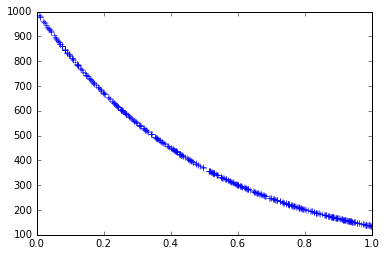

In [3]:
xmin,xmax = (0,1)
N = 500
xvals = np.random.uniform(xmin, xmax, N)
yvals0 = func0(xvals,a,b,c)
plt.plot(xvals, yvals0, '+')
plt.show()


In a second step we generate the error term $err$ and add it to the previously computed values, storing the results in yvals

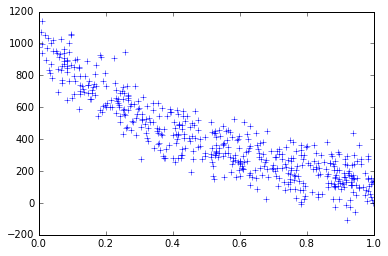

In [4]:
sig = 100.0
err = sig * np.random.standard_normal(N)
yvals = yvals0 + err
plt.plot(xvals, yvals, '+')
plt.show()

Fitting the curve

We now import the relvant module, and we now choose the functional relationship func
between our x and y that is parameterised by three parameters $a,b,c$ of the curve we want to fit. We here use the same relationship as above, but obviously we can fit any curve we want (eg, linear, quadratic etc). We also have to provide an initial guess for the paramters, here $a_i,b_i,c_i$.

In [5]:
# import the curve fitting module and standard imports
from scipy.optimize import curve_fit 

# choose the function to be fitted... 
def func (x,a,b,c):
    return a*np.exp(-b*x)+c

# ...and provide initial estimates for the parameters
a0,b0,c0 = (0.5,0.5,0.5)

We now execute the curve fit and plot the results. The coefficients will be in the tuple *coeffs=(a,b,c)* and *fiterr* will contain an error estimate. If *fiterr* is *NaN* (or the algorithm terminates with too many iterations) this means that the algorithm did not converge, which means we need to adapt the initial values (see below)

a=10.05, b=0.05, c=0.05


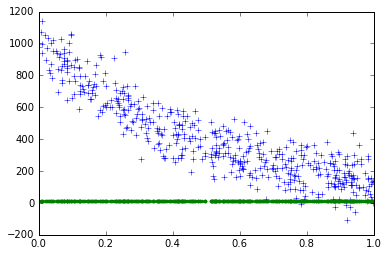

In [6]:
# manually fit the curve to obtain a viable set of starting parameters
at,bt,ct = (10.05,0.05,0.05)
plt.plot(xvals,yvals, '+')
plt.plot(xvals,func(xvals,at,bt,ct), 'g.')
print ("a=%s, b=%s, c=%s" % (at,bt,ct))

a=1011.50169421, b=2.05404670168, c=2.50533057048


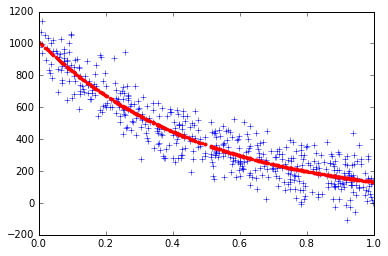

In [7]:
# exectute the curve fit...
coeffs, fiterr = curve_fit(func, xvals, yvals, p0=(at,bt,ct))

# ...and plot the results
print ("a=%s, b=%s, c=%s" % (coeffs[0], coeffs[1], coeffs[2]))
plt.plot(xvals,yvals, '+')
plt.plot(xvals,func(xvals,*coeffs),'r.')
plt.show()

In order to find the initial values we might want to plot the function with some initial parameters $at,bt,ct$ to allow for a rough manual fit